## Homework
Tarasenko Sergii


> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing median_house_values data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-median_house_values).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task. 
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,

In [4]:
df = df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity',
]]

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [5]:
df = df.fillna(0)
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN` +
* `INLAND`
* `NEAR OCEAN`

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [8]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households` +
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

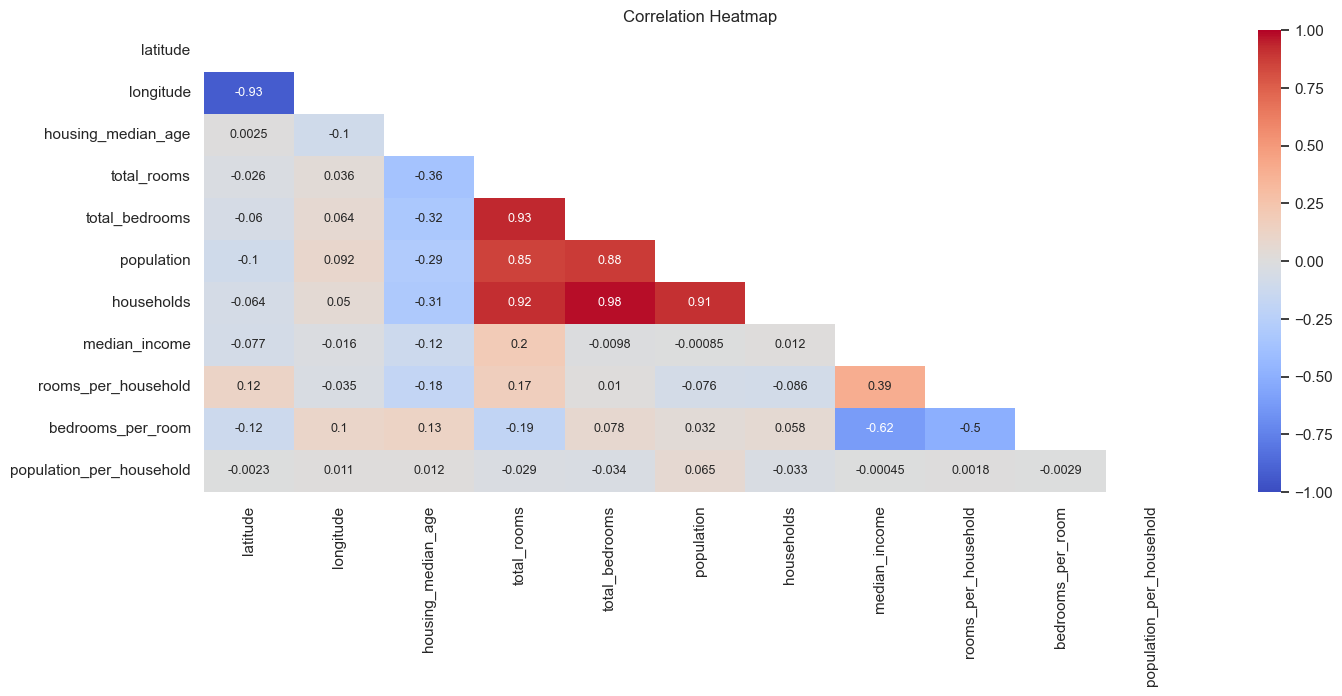

In [9]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train.corr(), dtype=bool))
sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm", annot_kws={"size":9})
plt.title('Correlation Heatmap');

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [10]:
above_average = (df['median_house_value'] > df['median_house_value'].mean()).astype(int)

In [11]:
df['above_average'] = above_average

In [12]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train.drop(['median_house_value', 'above_average'], axis=1, inplace=True)
df_val.drop(['median_house_value', 'above_average'], axis=1, inplace=True)
df_test.drop(['median_house_value', 'above_average'], axis=1, inplace=True)

### Question 3

* Calculate the mutual information score with the (binarized) median_house_value for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10 +
- 0.16

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  12384 non-null  float64
 1   longitude                 12384 non-null  float64
 2   housing_median_age        12384 non-null  float64
 3   total_rooms               12384 non-null  float64
 4   total_bedrooms            12384 non-null  float64
 5   population                12384 non-null  float64
 6   households                12384 non-null  float64
 7   median_income             12384 non-null  float64
 8   ocean_proximity           12384 non-null  object 
 9   rooms_per_household       12384 non-null  float64
 10  bedrooms_per_room         12384 non-null  float64
 11  population_per_household  12384 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.1+ MB


In [14]:
mutual_info_score(df_train.ocean_proximity, y_train).round(2)

0.1

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84 +
- 0.95

In [15]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [16]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42).fit(X_train, y_train)

In [17]:
y_pred = model.predict_proba(X_val)[:, 1]
score_full = accuracy_score(y_val, y_pred >= 0.5).round(2)
score_full

0.84

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` +
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [18]:
models_score = pd.DataFrame(columns=['Variable', 'Score'])
for i in df_train.columns:
    df_train_part = df_train.drop([i], axis=1)
    df_val_part = df_val.drop([i], axis=1)
    
    train_dict = df_train_part.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val_part.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model_part = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42).fit(X_train, y_train)
    y_pred = model_part.predict_proba(X_val)[:, 1]
    score = accuracy_score(y_val, y_pred >= 0.5).round(5)
    models_score.loc[len(models_score)] = [i, score - score_full]
models_score.sort_values(by='Score', ascending=False)
    


,Variable,Score
4,total_bedrooms,-0.00279
3,total_rooms,-0.00376
10,bedrooms_per_room,-0.00376
11,population_per_household,-0.00424
9,rooms_per_household,-0.00473
6,households,-0.00594
0,latitude,-0.00764
1,longitude,-0.00812
2,housing_median_age,-0.00836
5,population,-0.01369


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0 +
- 0.01
- 0.1
- 1
- 10

In [19]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

df_train.drop(['median_house_value', 'above_average'], axis=1, inplace=True)
df_val.drop(['median_house_value', 'above_average'], axis=1, inplace=True)
df_test.drop(['median_house_value', 'above_average'], axis=1, inplace=True)

In [20]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [21]:
for a in [0, 0.01, 0.1, 1, 10]:
    rl = Ridge(alpha=a, solver="sag", random_state=42).fit(X_train, y_train)
    y_pred_rl = rl.predict(X_val)
    score_rl = mean_squared_error(y_val, y_pred_rl, squared=False)
    print(f'For alpha  = {a}, RMSE = {score_rl.round(3)}')
    

For alpha  = 0, RMSE = 0.524
For alpha  = 0.01, RMSE = 0.524
For alpha  = 0.1, RMSE = 0.524
For alpha  = 1, RMSE = 0.524
For alpha  = 10, RMSE = 0.524


## Submit the results

* Submit your results here: https://forms.gle/vQXAnQDeqA81HSu86
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one

## Deadline

The deadline for submitting is 26 September (Monday), 23:00 CEST.

After that, the form will be closed.